In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def calc_density_z(system_name):

    colnames = []
    for g in np.arange(0,7.1,0.1):       #CHNANGE TO 7.1 FOR T90H10
        colnames.append('z_'+str(g))
    print(colnames)
    PFASframes = []                        # each element of the list contains the dataframe for a individual simulation replicate
    for i in range(1,11):              
        PFASframes.append(pd.read_csv(str(i)+system_name+'tstp_nPFAS_z0_z7.txt',delimiter=" ",names=colnames))   #each csv is for a single replicate each df=799x71
                                                                                                             #each column is the number of PFAS in a volume of 8nm x 8 nm x z(column index)
        
    density_z_rep_lst = []

    for k in range(10):    #index of the duplicate
        for i in [799]:
            P_z_80 = PFASframes[k].iloc[i,:].to_numpy() # this array contains the no of PFAS in a vol of 8nm x 8nm x z(column_index)nm x 2 (the abs z acoounts for both side of the graphene) 
            P_z_density_lst = []
            P_z_density_lst.append(P_z_80[0])
            for j in range(1,len(P_z_80)):
                P_z_density_lst.append(P_z_80[j]-P_z_80[j-1])
            P_z_density_arr = np.array(P_z_density_lst)/(8*8*0.1*2)   # the Vol is 80x80x1x2 ang^3 the 2 in the end means both directions    
        density_z_rep_lst.append(P_z_density_arr)   #stores all the simulation replicates
    density_z_rep_arr = np.array(density_z_rep_lst)
    mean_density_z=np.mean(density_z_rep_arr, axis=0)
    np.savetxt(system_name+'mean_density(z).txt', mean_density_z)
    stderror_density_z= stats.sem(density_z_rep_arr, axis=0, ddof=1)
    np.savetxt(system_name+'ste_density(z).txt', stderror_density_z)


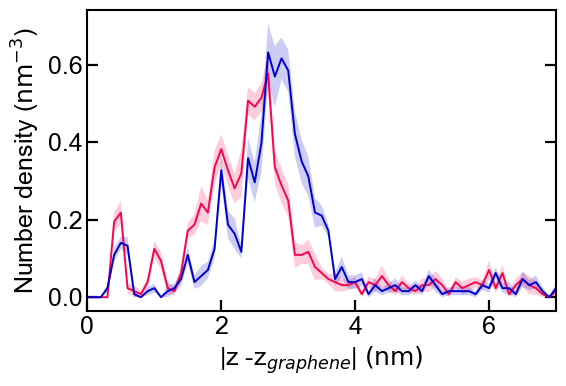

In [ ]:
system_name = 'H10T90_PFBA_'
calc_density_z(system_name)
mean_density_z_T90H10_PFBA = np.loadtxt(system_name+'mean_density(z).txt')
stE_density_z_T90H10_PFBA =  np.loadtxt(system_name+'ste_density(z).txt')

system_name = 'T90H10_PFOA_'
calc_density_z(system_name)
mean_density_z_T90H10_PFOA = np.loadtxt(system_name+'mean_density(z).txt')
stE_density_z_T90H10_PFOA =  np.loadtxt(system_name+'ste_density(z).txt')

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 18

color_HFBMA_PFBA = plt.cm.seismic(np.linspace(0.2, 1.2, 4)) 
color_HFBMA_PFOA = plt.cm.terrain(np.linspace(0.0, 0.14, 4))

r_range = np.arange(0, 7.1, 0.1, dtype=float)

fig, axs = plt.subplots(figsize=(6,4.2))
axs.plot(r_range, mean_density_z_T90H10_PFBA, color='xkcd:pink red',linewidth=1.4,label="PFBA")
axs.fill_between(r_range, mean_density_z_T90H10_PFBA+stE_density_z_T90H10_PFBA,  mean_density_z_T90H10_PFBA-stE_density_z_T90H10_PFBA, facecolor='xkcd:pink red',alpha=0.2)
axs.plot(r_range, mean_density_z_T90H10_PFOA, color='mediumblue',linewidth=1.4,label="PFOA")
axs.fill_between(r_range, mean_density_z_T90H10_PFOA+stE_density_z_T90H10_PFOA, mean_density_z_T90H10_PFOA-stE_density_z_T90H10_PFOA, facecolor='mediumblue',alpha=0.2)
axs.set_xlabel('|z -z$_{graphene}$| '+r'$\mathrm{(nm)}$')
axs.set_ylabel('Number density '+r'($\mathrm{nm ^{-3}}$)')


plt.annotate('PFBA', 
             xy=(20, mean_density_z_T90H10_PFBA[20]), 
             color='xkcd:pink red',
             fontsize=14,
             fontweight='bold',
             xytext=(8, 0.37), 
             arrowprops=dict(arrowstyle='-', color='xkcd:pink red', lw=2,  
                             ))  
plt.annotate('PFOA', 
             xy=(30,mean_density_z_T90H10_PFOA[30]),  
             color='mediumblue',
             fontsize=14,
             fontweight='bold',
             xytext=(35, 0.58),  
             arrowprops=dict(arrowstyle='-', color='mediumblue', lw=2,  
                             ))  

for spine in axs.spines.values():
    spine.set_linewidth(1.5)
axs.tick_params(axis='y', which='both', direction='in', left=True, right=True,length=8,width=1.6)
axs.tick_params(axis='x', which='both', direction='in', left=True, right=True,length=8,width=1.6)
plt.tight_layout()
axs.set_xlim(0, 7)
plt.savefig("PFBA-PFOA-number_density_T90H10_v2.png",dpi=330)



In [6]:
def calc_cumulative_density_z(system_name):

    colnames = []
    for g in np.arange(0,7.1,0.1):
        colnames.append('z_'+str(g))
    print(colnames)
    PFASframes = []                        # each element of the list contains the dataframe for a individual simulation replicate
    for i in range(1,11):              
        PFASframes.append(pd.read_csv(str(i)+system_name+'tstp_nPFAS_z0_z7.txt',delimiter=" ",names=colnames))   #each csv is for a single replicate each df=799x71
                                                                                                             #each column is the number of PFAS in a volume of 8nm x 8 nm x z(column index)
    density_z_rep_lst=[]   
    for k in range(10):    #index of the duplicate
        for i in [799]:
            P_z_80 = PFASframes[k].iloc[i,:].to_numpy() # this array contains the no of PFAS in a vol of 8nm x 8nm x z(column_index)nm x 2 (the abs z acoounts for both side of the graphene) 
            P_z_density_lst = []
            P_z_density_lst.append(P_z_80[0])
            for j in range(1,len(P_z_80)):
                P_z_density_lst.append(P_z_80[j])
            P_z_density_arr = np.array(P_z_density_lst)/(80*80*j*2)   # the Vol is 80x80x1x2 ang^3 the 2 in the end means both directions    
        density_z_rep_lst.append(P_z_density_arr)   #stores all the simulation replicates
    density_z_rep_arr = np.array(density_z_rep_lst)
    print(density_z_rep_arr)
    mean_density_z=np.mean(density_z_rep_arr, axis=0)
    np.savetxt(system_name+'mean_density(z).txt', mean_density_z)
    #stderror_density_z= stats.sem(density_z_rep_arr, axis=0, ddof=1)
    stderror_density_z= np.std(density_z_rep_arr, axis=0)
    np.savetxt(system_name+'ste_density(z).txt', stderror_density_z)


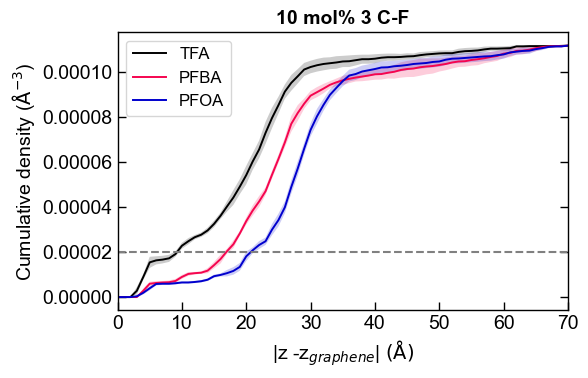

In [ ]:
system_name = 'H10T90_PFBA_'
calc_cumulative_density_z(system_name)
mean_density_z_T90H10_PFBA = np.loadtxt(system_name+'mean_density(z).txt')
stE_density_z_T90H10_PFBA =  np.loadtxt(system_name+'ste_density(z).txt')

system_name = 'T90H10_PFOA_'
calc_cumulative_density_z(system_name)
mean_density_z_T90H10_PFOA = np.loadtxt(system_name+'mean_density(z).txt')
stE_density_z_T90H10_PFOA =  np.loadtxt(system_name+'ste_density(z).txt')

system_name = 'H10T90_TFA_'
calc_cumulative_density_z(system_name)
mean_density_z_T90H10_TFA = np.loadtxt(system_name+'mean_density(z).txt')
stE_density_z_T90H10_TFA =  np.loadtxt(system_name+'ste_density(z).txt')


plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 14

color_HFBMA_PFBA = plt.cm.seismic(np.linspace(0.2, 1.2, 4)) 
color_HFBMA_PFOA = plt.cm.terrain(np.linspace(0.0, 0.14, 4))

r_range = np.arange(0, 71, 1, dtype=float)

fig, axs = plt.subplots(figsize=(6,4))
axs.plot(r_range, mean_density_z_T90H10_TFA, color='xkcd:black',linewidth=1.4,label="TFA")
axs.fill_between(r_range, mean_density_z_T90H10_TFA+stE_density_z_T90H10_TFA,  mean_density_z_T90H10_TFA-stE_density_z_T90H10_TFA, facecolor='xkcd:black',alpha=0.2)
axs.plot(r_range, mean_density_z_T90H10_PFBA, color='xkcd:pink red',linewidth=1.4,label="PFBA")
axs.fill_between(r_range, mean_density_z_T90H10_PFBA+stE_density_z_T90H10_PFBA,  mean_density_z_T90H10_PFBA-stE_density_z_T90H10_PFBA, facecolor='xkcd:pink red',alpha=0.2)
axs.plot(r_range, mean_density_z_T90H10_PFOA, color='mediumblue',linewidth=1.4,label="PFOA")
axs.fill_between(r_range, mean_density_z_T90H10_PFOA+stE_density_z_T90H10_PFOA, mean_density_z_T90H10_PFOA-stE_density_z_T90H10_PFOA, facecolor='mediumblue',alpha=0.2)
axs.set_xlabel('|z -z$_{graphene}$| '+r'$\mathrm{(\AA)}$')
axs.set_ylabel('Cumulative density '+r'($\mathrm{\AA ^{-3}}$)')
                   
for spine in axs.spines.values():
    spine.set_linewidth(1)
axs.tick_params(axis='y', which='both', direction='in', left=True, right=True,length=6,width=1.0)
axs.tick_params(axis='x', which='both', direction='in', left=True, right=True,length=6,width=1.0)
plt.title("10 mol% 3 C-F", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.axhline(y=0.00002,linestyle='dashed', color='gray')
plt.tight_layout()
axs.set_xlim(0, 70)
plt.savefig("PFBA-PFOA-number_cumulative_density_T90H10.png",dpi=330)